In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
from mpl_toolkits.mplot3d import *
import ipywidgets as widgets
from ipywidgets import interact
import mplcursors
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# Read datasets.
youtube_spotify = pd.read_csv('Spotify_Youtube.csv')
tiktok_19 = pd.read_excel('TikTok_songs_2019.xlsx')
tiktok_20 = pd.read_csv('TikTok_songs_2020.csv')
tiktok_21 = pd.read_csv('TikTok_songs_2021.csv')
tiktok_22 = pd.read_csv('TikTok_songs_2022.csv')
tiktok = pd.concat([tiktok_19, tiktok_20], ignore_index=True, sort=False)
tiktok = pd.concat([tiktok, tiktok_21], ignore_index=True, sort=False)
tiktok = pd.concat([tiktok, tiktok_22], ignore_index=True, sort=False)
tiktok 

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Shake It,Metro Station,53,Metro Station,68,0.618,0.955,-3.836,1,4,0.0798,0.002210,0.000003,0.4860,0.790,150.034,4,179947
1,Chinese New Year,SALES,61,SALES - EP,53,0.744,0.845,-7.422,0,4,0.2530,0.759000,0.232000,0.1000,0.749,75.221,4,160000
2,Baby I'm Yours,Breakbot,57,By Your Side,69,0.829,0.792,-3.755,0,2,0.0668,0.726000,0.000006,0.1220,0.758,118.050,4,215507
3,The Git Up,Blanco Brown,60,The Git Up,2,0.847,0.678,-8.635,1,9,0.1090,0.066900,0.000000,0.2740,0.811,97.984,4,200594
4,Say Hey (I Love You),Michael Franti & Spearhead,58,All Rebel Rockers,0,0.738,0.983,-4.374,0,5,0.0855,0.038000,0.000006,0.1830,0.957,92.998,4,235760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,The Less I Know The Better,Tame Impala,78,Currents,84,0.640,0.740,-4.083,1,4,0.0284,0.011500,0.006780,0.1670,0.785,116.879,4,216320
964,Dandelions,Ruth B.,75,Safe Haven,90,0.609,0.692,-2.958,1,1,0.0259,0.015700,0.000000,0.0864,0.454,116.959,3,233720
965,Jimmy Cooks (feat. 21 Savage),Drake,95,"Honestly, Nevermind",92,0.529,0.673,-4.711,1,0,0.1750,0.000307,0.000002,0.0930,0.366,165.921,4,218365
966,Good Looking,Suki Waterhouse,64,Good Looking,80,0.377,0.558,-9.076,1,4,0.0299,0.078900,0.000342,0.1250,0.267,149.971,3,214800


In [4]:
# Merge Pandas DataFrames using left_on and right_on
tracks = pd.merge(youtube_spotify, tiktok, left_on="Track", right_on="track_name")
tracks = tracks.drop(['duration_ms','artist_name','instrumentalness','liveness','valence','tempo','track_name','album','danceability','energy','loudness','mode','key','speechiness','acousticness'], axis = 1)
tracks.sort_values(by='Stream')
tracks = tracks.drop_duplicates(subset=['Track','Artist'], keep="last")
tracks

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream,artist_pop,track_pop,time_signature
0,25,50 Cent,https://open.spotify.com/artist/3q7HBObVc0L8jN...,Disco Inferno,The Massacre,album,spotify:track:69bHJ9qs5FrUJbKP8xU8uZ,0.925,0.659,3.0,-4.763,0.2310,0.2060,0.000079,0.2790,0.710,97.018,214227.0,https://www.youtube.com/watch?v=GNqYWkiBHHw,50 Cent - Disco Inferno (Official Music Video),50CentVEVO,3.982595e+07,382791.0,12038.0,REMASTERED IN HD!\n\nOfficial Music Video for ...,True,True,202477187.0,82,73,4
2,46,Coldplay,https://open.spotify.com/artist/4gzpq5DPGxSnKT...,Paradise,Mylo Xyloto,album,spotify:track:6nek1Nin9q48AVZcWs9e9D,0.449,0.585,5.0,-6.761,0.0268,0.0509,0.000087,0.0833,0.212,139.631,278719.0,https://www.youtube.com/watch?v=1G4isv_Fylg,Coldplay - Paradise (Official Video),Coldplay,1.665814e+09,8497224.0,343020.0,Coldplay - Paradise is taken from the album My...,True,True,927288329.0,72,75,4
4,2154,Sade,https://open.spotify.com/artist/47zz7sob9NUcOD...,Paradise,The Best of Sade,compilation,spotify:track:4tReFKumS5bcFahdXDiM1b,0.738,0.792,1.0,-7.873,0.0378,0.3090,0.390000,0.0679,0.968,99.817,217467.0,https://www.youtube.com/watch?v=C0BLKudnyNo,Sade - Paradise - Official - 1988,SadeVEVO,2.771063e+07,143842.0,4873.0,Sade – Paradise\nDirector - Alex McDowell - Ju...,True,True,43384851.0,72,75,4
6,16815,George Ezra,https://open.spotify.com/artist/2ysnwxxNtSgbb9...,Paradise,Staying at Tamara's,album,spotify:track:38zwkK6TtTjIW9tpYBfZ3D,0.642,0.881,11.0,-3.537,0.0393,0.2090,0.000000,0.2100,0.913,138.030,222045.0,https://www.youtube.com/watch?v=XOwihbur34E,George Ezra - Paradise (Official Video),GeorgeEzraVEVO,1.043852e+08,473813.0,13926.0,George Ezra - Paradise (Official Video)\nThe n...,True,True,298395323.0,72,75,4
8,19001,Bazzi,https://open.spotify.com/artist/4GvEc3ANtPPjt1...,Paradise,Soul Searching,album,spotify:track:0Rx0DJI556Ix5gBny6EWmn,0.844,0.644,11.0,-6.273,0.0479,0.0828,0.000000,0.1130,0.591,122.061,169038.0,https://www.youtube.com/watch?v=x90WLRa5uGo,Bazzi - Paradise [Official Music Video],Bazzi,3.482375e+07,457464.0,6463.0,I’m bringing the dream to you on tour😭I absolu...,True,True,515623742.0,72,75,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,20035,Pop Smoke,https://open.spotify.com/artist/0eDvMgVFoNV3Tp...,For The Night (feat. Lil Baby & DaBaby),Shoot For The Stars Aim For The Moon,album,spotify:track:0PvFJmanyNQMseIFrU708S,0.823,0.586,6.0,-6.606,0.2000,0.1140,0.000000,0.1930,0.347,125.971,190476.0,https://www.youtube.com/watch?v=Q9pjm4cNsfc,Pop Smoke - For The Night (Audio) ft. Lil Baby...,POPSMOKEVEVO,4.305904e+08,3674140.0,73211.0,Pop Smoke - For The Night (Audio) ft. Lil Baby...,True,True,948882963.0,83,80,4
685,20038,Pop Smoke,https://open.spotify.com/artist/0eDvMgVFoNV3Tp...,Mood Swings (feat. Lil Tjay),Shoot For The Stars Aim For The Moon,album,spotify:track:5rZlwNFl01HqLWBQGryKSm,0.480,0.602,10.0,-6.335,0.3680,0.4870,0.000000,0.0848,0.269,179.798,213333.0,https://www.youtube.com/watch?v=mM8ostx0Ub8,POP SMOKE - MOOD SWINGS ft. Lil Tjay (Official...,POP SMOKE,1.252490e+08,1402215.0,38745.0,Mood Swings ft. Lil Tjay - (Official Video) by...,False,True,633379221.0,83,78,4
686,20324,Stephen Sanchez,https://open.spotify.com/artist/5XKFrudbV4IiuE...,Until I Found You,Easy On My Eyes,album,spotify:track:6VhuP99TE6gYNQRJIlAWFD,0.346,0.500,10.0,-6.097,0.0388,0.7570,0.000000,0.1890,0.191,202.466,176667.0,https://www.youtube.com/watch?v=GxldQ9eX2wo,Stephen Sanchez - Until I Found You,StephenSanchezVEVO,8.763725e+07,1658120.0,22120.0,"Stream/Download my new EP, Easy On My Eyes: ht...",True,True,508567547.0,74,90,3
687,20423,ENHYPEN,https://open.spotify.com/artist/5t5FqBwTcgKTaW...,Polaroid Love,DIMENSION : ANSWER,album,spoti

In [5]:
df = tracks
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream,artist_pop,track_pop,time_signature
Unnamed: 0,1.000000,0.041429,-0.067574,0.027147,0.118655,-0.018057,0.088580,-0.012417,-0.001136,-0.052533,0.034033,-0.304693,0.005659,0.150674,0.055217,0.224142,0.176369,0.080981,-0.045082
Danceability,0.041429,1.000000,0.067319,0.029035,0.155608,0.182365,-0.180649,-0.069093,-0.097331,0.382162,-0.252098,-0.164385,0.069675,0.092991,0.048689,0.058516,0.147266,0.041177,0.196995
Energy,-0.067574,0.067319,1.000000,0.047175,0.737663,0.011369,-0.560351,0.004804,0.111302,0.380326,0.062799,0.026639,0.044747,-0.005252,-0.016509,-0.032000,0.005891,0.053651,0.054877
Key,0.027147,0.029035,0.047175,1.000000,-0.014262,0.064437,-0.029418,0.043184,0.111541,0.053875,-0.042784,-0.037749,-0.095110,-0.072758,0.004240,-0.044863,-0.044038,-0.062852,0.051190
Loudness,0.118655,0.155608,0.737663,-0.014262,1.000000,-0.023486,-0.477483,-0.090823,0.076485,0.227004,0.051049,-0.034418,0.132691,0.135069,0.057921,0.102077,0.107746,0.072237,0.022072
Speechiness,-0.018057,0.182365,0.011369,0.064437,-0.023486,1.000000,-0.017447,-0.033731,-0.003372,-0.019386,0.084561,-0.051545,-0.060045,-0.028011,0.005867,-0.074345,0.064975,-0.044383,0.028263
Acousticness,0.088580,-0.180649,-0.560351,-0.029418,-0.477483,-0.017447,1.000000,0.113551,-0.058297,-0.209260,-0.029631,-0.042813,-0.055813,-0.051696,-0.067713,0.014969,-0.054820,-0.029991,-0.087733
Instrumentalness,-0.012417,-0.069093,0.004804,0.043184,-0.090823,-0.033731,0.113551,1.000000,-0.006993,-0.051011,-0.004210,0.023544,-0.089489,-0.102584,-0.034630,-0.112766,-0.081551,0.010108,-0.103777
Liveness,-0.001136,-0.097331,0.111302,0.111541,0.076485,-0.003372,-0.058297,-0.006993,1.000000,-0.034422,-0.015310,-0.003567,-0.032296,0.030192,-0.016801,0.038274,0.036637,-0.028130,-0.057229
Valence,-0.052533,0.382162,0.380326,0.053875,0.227004,-0.019386,-0.209260,-0.051011,-0.034422,1.000000,-0.016432,-0.117292,-0.022907,-0.016268,0.027066,-0.014663,0.047563,0.095161,0.127090


In [6]:
#Removing features from dataframe.

features = tracks.columns[7:].tolist()
features.remove('Description')
features.remove('Channel')
features.remove('Comments')
features.remove('Url_youtube')
features.remove('Title')
features.remove('official_video')
features.remove('Stream')
features.remove('artist_pop')
features.remove('track_pop')
features.remove('Views')
features.remove('Likes')
features.remove('Licensed')
features.remove('time_signature')
features.remove('Tempo')
features.remove('Duration_ms')
features.remove('Key')
features.remove('Loudness')

In [7]:
size = 10
top_songs = tracks.sort_values(by='Stream')
songs = top_songs['Track'][:size]
artists = top_songs['Artist'][:size]
top_songs = top_songs.dropna()

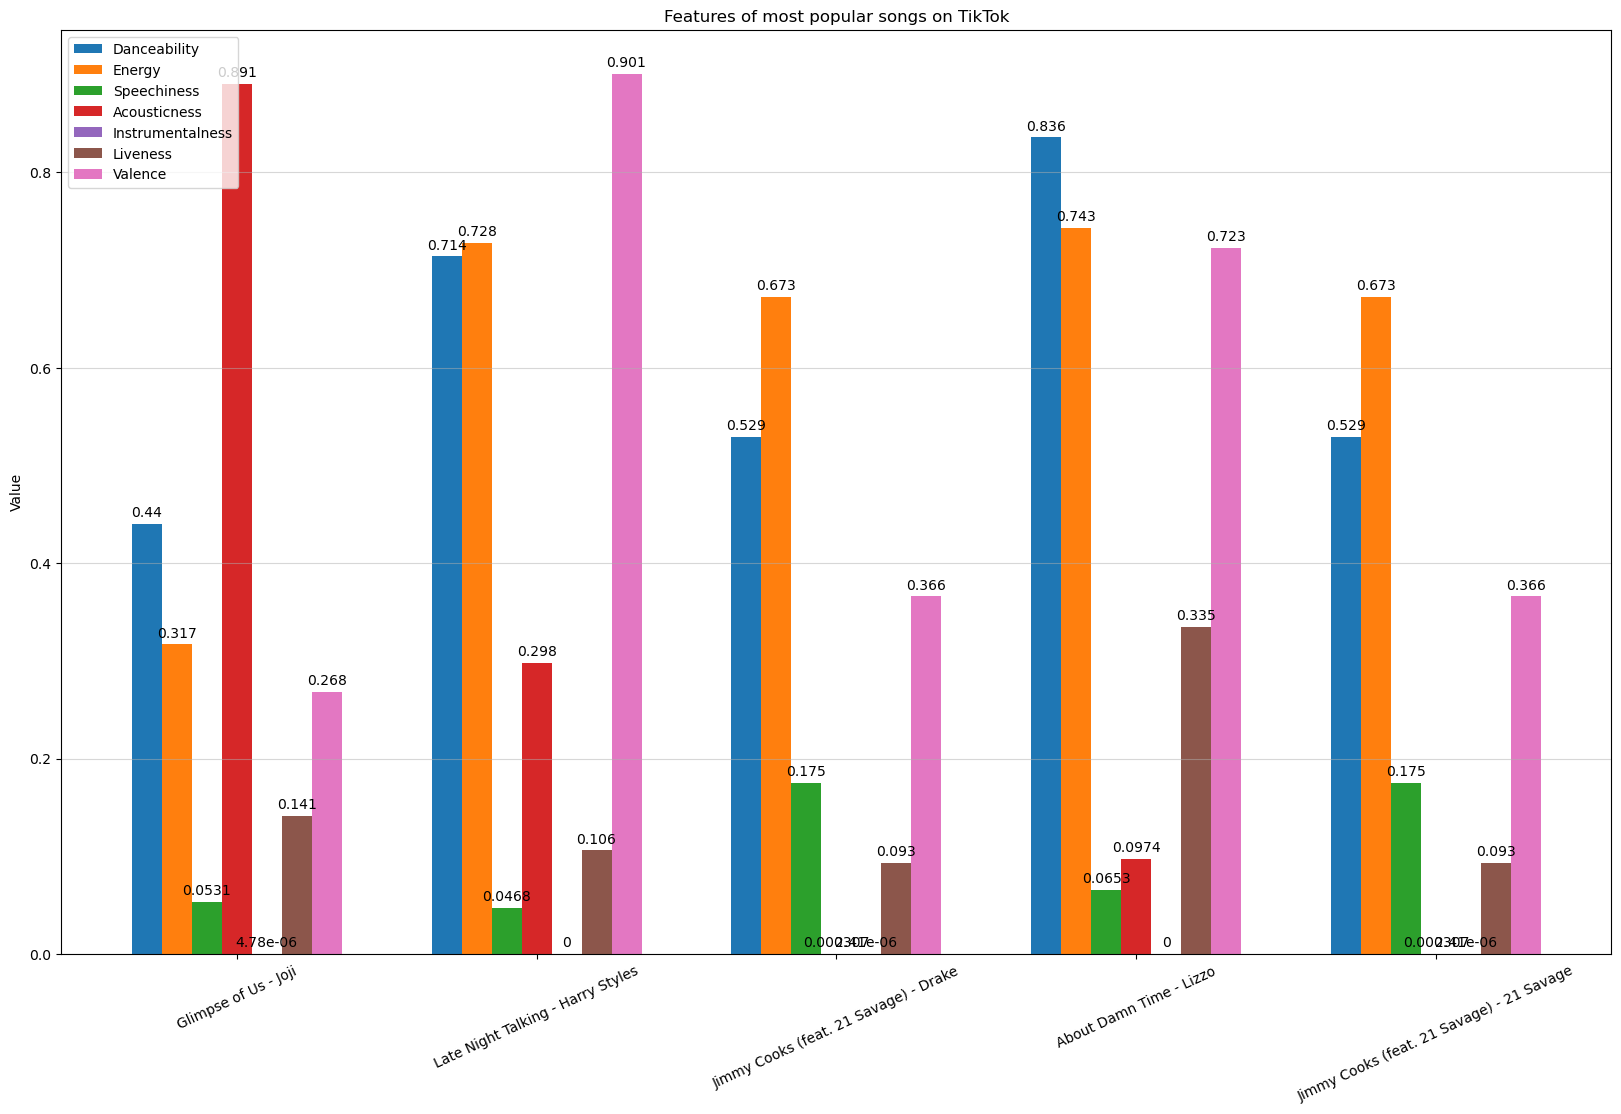

In [8]:
size = 5
platform = 'TikTok'

if platform == 'TikTok':
    feature = 'track_pop'
elif platform == 'YouTube':
    feature = 'Likes'
elif platform == 'Spotify':
    feature = 'Stream'
    
top_songs = tracks.sort_values(by=feature,ascending=False).dropna()
songs = top_songs['Track'][:size]
artists = top_songs['Artist'][:size]
features_dict = {
    'Danceability': (top_songs['Danceability'][:size]),
    'Energy': (top_songs['Energy'][:size]),
    'Speechiness': (top_songs['Speechiness'][:size]),
    'Acousticness': (top_songs['Acousticness'][:size]),
    'Instrumentalness': (top_songs['Instrumentalness'][:size]),
    'Liveness': (top_songs['Liveness'][:size]),
    'Valence': (top_songs['Valence'][:size]),
}

x = np.arange(len(songs))  # the label locations
width = 0.1  # the width of the bars
multiplier = 0

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot()

for attribute, measurement in features_dict.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value')
ax.set_title('Features of most popular songs on '+platform)
ax.set_xticks(x + width*3, songs+' - '+artists)
ax.legend(loc='upper left')
ax.yaxis.grid(alpha=0.5)
plt.xticks(rotation=25);

In [9]:
top_songs

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream,artist_pop,track_pop,time_signature
598,18578,Joji,https://open.spotify.com/artist/3MZsBdqDrRTJih...,Glimpse of Us,SMITHEREENS,album,spotify:track:4ewazQLXFTDC8XvCbhvtXs,0.440,0.317,8.0,-9.258,0.0531,0.891000,0.000005,0.1410,0.2680,169.914,233456.0,https://www.youtube.com/watch?v=NgsWGfUlwJI,Joji - Glimpse of Us (Official Video),Joji,41751204.0,1757819.0,51965.0,"""Glimpse of Us"" - out now. Stream: https://joj...",True,True,769993739.0,85,97,3
630,19127,Harry Styles,https://open.spotify.com/artist/6KImCVD70vtIoJ...,Late Night Talking,Harry's House,album,spotify:track:1qEmFfgcLObUfQm0j1W2CK,0.714,0.728,10.0,-4.595,0.0468,0.298000,0.000000,0.1060,0.9010,114.996,177955.0,https://www.youtube.com/watch?v=4VaqA-5aQTM,Harry Styles - Late Night Talking (Official Vi...,HarryStylesVEVO,52107049.0,1296669.0,35766.0,"Official Video for ""Late Night Talking"" by Har...",True,True,540698676.0,91,93,4
55,13500,Drake,https://open.spotify.com/artist/3TVXtAsR1Inumw...,Jimmy Cooks (feat. 21 Savage),"Honestly, Nevermind",album,spotify:track:3F5CgOj3wFlRv51JsHbxhe,0.529,0.673,0.0,-4.711,0.1750,0.000307,0.000002,0.0930,0.3660,165.921,218365.0,https://www.youtube.com/watch?v=4nyld2SqleU,Drake & 21 Savage - Jimmy Cooks,Drake,12454414.0,461655.0,14486.0,Official audio for Drake & 21 Savage “Jimmy Co...,False,True,413205085.0,95,92,4
535,16718,Lizzo,https://open.spotify.com/artist/56oDRnqbIiwx4m...,About Damn Time,Special,album,spotify:track:6HMtHNpW6YPi1hrw9tgF8P,0.836,0.743,10.0,-6.305,0.0653,0.097400,0.000000,0.3350,0.7230,108.965,191938.0,https://www.youtube.com/watch?v=IXXxciRUMzE,Lizzo - About Damn Time [Official Video],Lizzo Music,107797874.0,1505620.0,34922.0,Lizzo - About Damn Time [Official Video]\nDow...,True,True,571894128.0,81,92,4
54,322,21 Savage,https://open.spotify.com/artist/1URnnhqYAYcrqr...,Jimmy Cooks (feat. 21 Savage),"Honestly, Nevermind",album,spotify:track:3F5CgOj3wFlRv51JsHbxhe,0.529,0.673,0.0,-4.711,0.1750,0.000307,0.000002,0.0930,0.3660,165.921,218365.0,https://www.youtube.com/watch?v=4nyld2SqleU,Drake & 21 Savage - Jimmy Cooks,Drake,12454143.0,461647.0,14487.0,Official audio for Drake & 21 Savage “Jimmy Co...,False,True,413205085.0,95,92,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,7896,Kool Savas,https://open.spotify.com/artist/1SUu1Bi7ev9HbO...,AMG,AGHORI,album,spotify:track:4oPnjYqS5YYUpDpdm63pWa,0.741,0.626,1.0,-4.688,0.1510,0.178000,0.000000,0.2990,0.3680,85.967,209258.0,https://www.youtube.com/watch?v=nUenUqBsTCE,Kool Savas - AMG (feat. Alies) (prod. Supersonic),Kool Savas Official | Essah TV,12580585.0,138775.0,5773.0,AMG jetzt streamen ► http://koolsavas.fty.li/A...,True,True,54240874.0,36,0,4
547,16970,Dan + Shay,https://open.spotify.com/artist/7z5WFjZAIYejWy...,Tequila,Dan + Shay,album,spotify:track:42fw0rxRO2xbesF6mJfd4Y,0.489,0.581,11.0,-5.731,0.0281,0.031200,0.000000,0.1320,0.4940,86.016,196747.0,https://www.youtube.com/watch?v=c4qgqNS_20s,Dan + Shay - Tequila (Official Music Video),Dan And Shay,145992423.0,563326.0,10640.0,"LISTEN TO OUR NEW SINGLE ""GLAD YOU EXIST"" EVER...",True,True,517385494.0,48,0,4
199,3129,E-40,https://open.spotify.com/artist/3crnzLy8R4lVwa...,Choices (Yup),Sharp On All 4 Corners (Deluxe Edition),album,spotify:track:5vIu19A3EEdHgFM4Cba6F4,0.892,0.607,9.0,-7.232,0.3670,0.144000,0.000314,0.0909,0.2440,120.000,272720.0,https://www.youtube.com/watch?v=arqTu9Ay4Ig,"E-40 ""Choices (Yup)"" (WSHH Exclusive - Officia...",WORLDSTARHIPHOP,12377694.0,158336.0,4845.0,The official WorldStarHipHop premiere of E-40’...,False,False,84519884.0,66,0,4
275,8367,M83,https://open.spotify.com/artist/63MQldklfxkjYD...,Midnight City,"Hurry Up, We're Dreaming",album,spot

## Task 1

In [10]:
def f(Size, Platform):
    # Features. 
    fig = plt.figure(figsize=(9,5))
    ax = fig.add_subplot()
    size = Size
    platform = Platform

    if platform == 'TikTok':
        index = 'track_pop'
    elif platform == 'YouTube':
        index = 'Likes'
    elif platform == 'Spotify':
        index = 'Stream'

    top_songs = tracks.sort_values(by=index,ascending=False).dropna()
    songs = top_songs['Track'][:size]
    artists = top_songs['Artist'][:size]

    # Plot.
    features_dict = {}
    for feature in features:
        features_dict[feature] = top_songs[feature][:size]
    ax.boxplot(features_dict.values())
    ax.set_xticklabels(features_dict.keys())
    ax.set_title('Features distribution for the top '+ str(size) + ' songs on '+ platform);
    fig.tight_layout()
    fig.canvas.draw()

interact(f, Size=widgets.IntSlider(min=1, max=len(tracks), step=1, value=1), Platform=['TikTok','Spotify','YouTube'])

interactive(children=(IntSlider(value=1, description='Size', max=549, min=1), Dropdown(description='Platform',…

<function __main__.f(Size, Platform)>

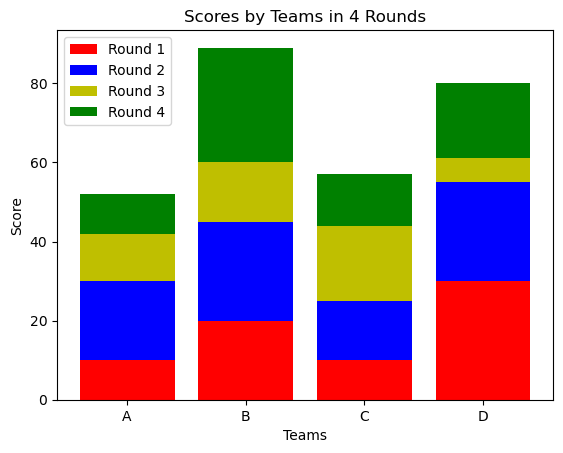

In [11]:

# importing package
import matplotlib.pyplot as plt
import numpy as np
 
# create data
x = ['A', 'B', 'C', 'D']
ax.invert_yaxis()
y1 = np.array([10, 20, 10, 30])
y2 = np.array([20, 25, 15, 25])
y3 = np.array([12, 15, 19, 6])
y4 = np.array([10, 29, 13, 19])
 
# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='y')
plt.bar(x, y4, bottom=y1+y2+y3, color='g')
plt.xlabel("Teams")
plt.ylabel("Score")
plt.legend(["Round 1", "Round 2", "Round 3", "Round 4"])
plt.title("Scores by Teams in 4 Rounds")
plt.show()

C:\Users\Giulio\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Giulio\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Giulio\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Giulio\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Giulio\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Giulio\an

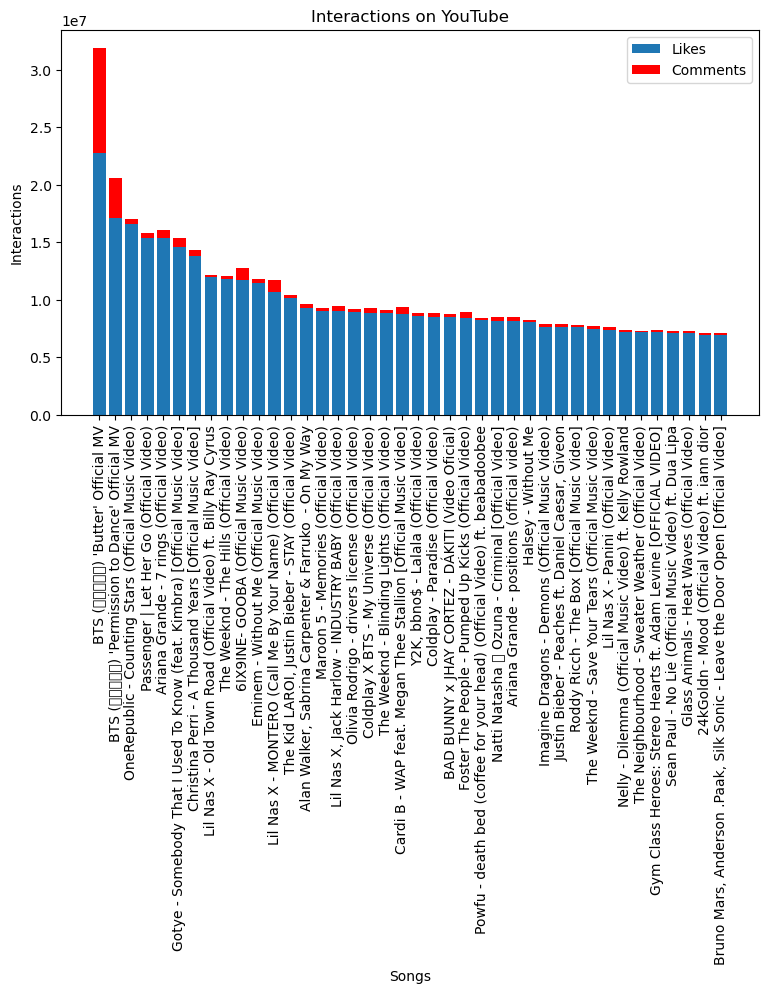

In [12]:
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot()
size = 50
# create data
top_songs = tracks.sort_values(by='Likes',ascending=False).dropna()
top_songs = top_songs[1:size]
x = top_songs['Title'].to_list()
y1 = top_songs['Likes'].to_list()
y2 = top_songs['Comments'].to_list()
 
# plot bars in stack manner
ax.bar(x, y1);
ax.bar(x, y2, bottom=y1,color='red');
ax.set_xlabel("Songs");
ax.set_ylabel("Interactions");
ax.legend(["Likes", "Comments"]);
ax.set_title("Interactions on YouTube");
plt.xticks(rotation = 90);

## Task 3

In [14]:
tracks

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream,artist_pop,track_pop,time_signature
0,25,50 Cent,https://open.spotify.com/artist/3q7HBObVc0L8jN...,Disco Inferno,The Massacre,album,spotify:track:69bHJ9qs5FrUJbKP8xU8uZ,0.925,0.659,3.0,-4.763,0.2310,0.2060,0.000079,0.2790,0.710,97.018,214227.0,https://www.youtube.com/watch?v=GNqYWkiBHHw,50 Cent - Disco Inferno (Official Music Video),50CentVEVO,3.982595e+07,382791.0,12038.0,REMASTERED IN HD!\n\nOfficial Music Video for ...,True,True,202477187.0,82,73,4
2,46,Coldplay,https://open.spotify.com/artist/4gzpq5DPGxSnKT...,Paradise,Mylo Xyloto,album,spotify:track:6nek1Nin9q48AVZcWs9e9D,0.449,0.585,5.0,-6.761,0.0268,0.0509,0.000087,0.0833,0.212,139.631,278719.0,https://www.youtube.com/watch?v=1G4isv_Fylg,Coldplay - Paradise (Official Video),Coldplay,1.665814e+09,8497224.0,343020.0,Coldplay - Paradise is taken from the album My...,True,True,927288329.0,72,75,4
4,2154,Sade,https://open.spotify.com/artist/47zz7sob9NUcOD...,Paradise,The Best of Sade,compilation,spotify:track:4tReFKumS5bcFahdXDiM1b,0.738,0.792,1.0,-7.873,0.0378,0.3090,0.390000,0.0679,0.968,99.817,217467.0,https://www.youtube.com/watch?v=C0BLKudnyNo,Sade - Paradise - Official - 1988,SadeVEVO,2.771063e+07,143842.0,4873.0,Sade – Paradise\nDirector - Alex McDowell - Ju...,True,True,43384851.0,72,75,4
6,16815,George Ezra,https://open.spotify.com/artist/2ysnwxxNtSgbb9...,Paradise,Staying at Tamara's,album,spotify:track:38zwkK6TtTjIW9tpYBfZ3D,0.642,0.881,11.0,-3.537,0.0393,0.2090,0.000000,0.2100,0.913,138.030,222045.0,https://www.youtube.com/watch?v=XOwihbur34E,George Ezra - Paradise (Official Video),GeorgeEzraVEVO,1.043852e+08,473813.0,13926.0,George Ezra - Paradise (Official Video)\nThe n...,True,True,298395323.0,72,75,4
8,19001,Bazzi,https://open.spotify.com/artist/4GvEc3ANtPPjt1...,Paradise,Soul Searching,album,spotify:track:0Rx0DJI556Ix5gBny6EWmn,0.844,0.644,11.0,-6.273,0.0479,0.0828,0.000000,0.1130,0.591,122.061,169038.0,https://www.youtube.com/watch?v=x90WLRa5uGo,Bazzi - Paradise [Official Music Video],Bazzi,3.482375e+07,457464.0,6463.0,I’m bringing the dream to you on tour😭I absolu...,True,True,515623742.0,72,75,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,20035,Pop Smoke,https://open.spotify.com/artist/0eDvMgVFoNV3Tp...,For The Night (feat. Lil Baby & DaBaby),Shoot For The Stars Aim For The Moon,album,spotify:track:0PvFJmanyNQMseIFrU708S,0.823,0.586,6.0,-6.606,0.2000,0.1140,0.000000,0.1930,0.347,125.971,190476.0,https://www.youtube.com/watch?v=Q9pjm4cNsfc,Pop Smoke - For The Night (Audio) ft. Lil Baby...,POPSMOKEVEVO,4.305904e+08,3674140.0,73211.0,Pop Smoke - For The Night (Audio) ft. Lil Baby...,True,True,948882963.0,83,80,4
685,20038,Pop Smoke,https://open.spotify.com/artist/0eDvMgVFoNV3Tp...,Mood Swings (feat. Lil Tjay),Shoot For The Stars Aim For The Moon,album,spotify:track:5rZlwNFl01HqLWBQGryKSm,0.480,0.602,10.0,-6.335,0.3680,0.4870,0.000000,0.0848,0.269,179.798,213333.0,https://www.youtube.com/watch?v=mM8ostx0Ub8,POP SMOKE - MOOD SWINGS ft. Lil Tjay (Official...,POP SMOKE,1.252490e+08,1402215.0,38745.0,Mood Swings ft. Lil Tjay - (Official Video) by...,False,True,633379221.0,83,78,4
686,20324,Stephen Sanchez,https://open.spotify.com/artist/5XKFrudbV4IiuE...,Until I Found You,Easy On My Eyes,album,spotify:track:6VhuP99TE6gYNQRJIlAWFD,0.346,0.500,10.0,-6.097,0.0388,0.7570,0.000000,0.1890,0.191,202.466,176667.0,https://www.youtube.com/watch?v=GxldQ9eX2wo,Stephen Sanchez - Until I Found You,StephenSanchezVEVO,8.763725e+07,1658120.0,22120.0,"Stream/Download my new EP, Easy On My Eyes: ht...",True,True,508567547.0,74,90,3
687,20423,ENHYPEN,https://open.spotify.com/artist/5t5FqBwTcgKTaW...,Polaroid Love,DIMENSION : ANSWER,album,spoti

In [27]:
def f(Number,Platform):
    platform = Platform

    if platform == 'TikTok':
        index = 'track_pop'
    elif platform == 'YouTube':
        index = 'Likes'
    elif platform == 'Spotify':
        index = 'Stream'

    top_songs = tracks.sort_values(by=index,ascending=False).dropna()
    top_songs = top_songs[1:Number]
    types = top_songs['Album_type'].unique()
    my_dict = {}
    for type in types:
        my_dict[type] = len(top_songs[top_songs['Album_type']==type])
    fig, ax = plt.subplots()
    ax.pie(my_dict.values(), labels=my_dict.keys(),autopct='%1.1f%%')
    ax.set_title('Album type for the top '+str(Number)+' songs on '+Platform)
    ax.legend()
    fig.tight_layout()
interact(f,Number=widgets.IntSlider(min=2, max=len(tracks), step=1, value=1), Platform=['Spotify','YouTube','TikTok'])

interactive(children=(IntSlider(value=2, description='Number', max=549, min=2), Dropdown(description='Platform…

<function __main__.f(Number, Platform)>